# CUSTOMER CHURN PREDICTION


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import warnings 
warnings.filterwarnings('ignore')

In [4]:
data = 'Churn_Modelling.csv'
df= pd.read_csv(data)

In [5]:
df.shape

(10000, 14)

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Frequency Distribution

In [8]:
for val in df.columns:
    print(df[val].value_counts())

RowNumber
1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Name: count, Length: 10000, dtype: int64
CustomerId
15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: count, Length: 10000, dtype: int64
Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64
CreditScore
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: count, Length: 460, dtype: int64
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Gender
Male      5457
Female    4543
Name: count, dtype: int64
Age
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88    

In [9]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

 Declare Feature vector and Target Vector

In [10]:
x=df.drop(['Exited'],axis=1)
y=df['Exited']

Split dataset into train and test dataset

In [11]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [12]:
x_train.shape

(8000, 13)

In [13]:
x_test.shape

(2000, 13)

In [14]:
import category_encoders as ce


In [15]:
encoder = ce.OrdinalEncoder(cols=['RowNumber','CustomerId','Surname','CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary'])

In [16]:
x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)


Model Training

In [30]:
from sklearn.linear_model import LogisticRegression

lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [18]:
y_pred_test=lg.predict(x_test)

In [19]:
from sklearn.metrics import accuracy_score
print('model accuracy score :{0:0.4f}'.format(accuracy_score(y_test,y_pred_test)))

model accuracy score :0.8030


In [20]:
y_test.value_counts()

Exited
0    1595
1     405
Name: count, dtype: int64

In [25]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred_test)
print('Confusion Matrix\n\n',cm)

Confusion Matrix

 [[1589    6]
 [ 388   17]]


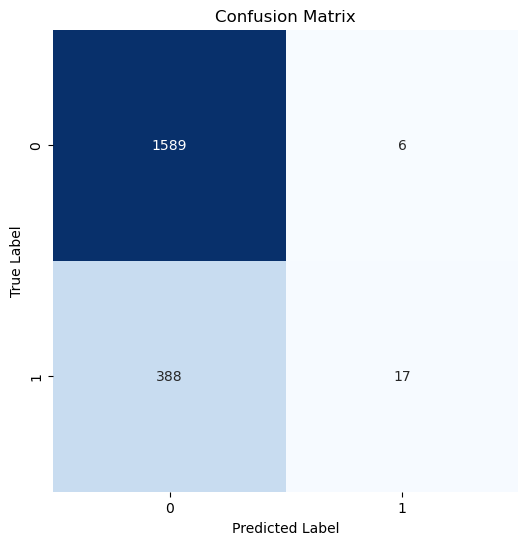

In [26]:
class_names = ['0','1']
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [28]:
from sklearn.metrics import classification_report

In [29]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1595
           1       0.74      0.04      0.08       405

    accuracy                           0.80      2000
   macro avg       0.77      0.52      0.48      2000
weighted avg       0.79      0.80      0.73      2000

